# Proyek Analisis Data: Bike Sharing Analyst
- **Nama:** Dea Ramanda
- **Email:** iamsenzaura@gmail.com 
- **ID Dicoding:** [senzaura](https://www.dicoding.com/users/senzaura/academies)
- **Github:** [adnamard](https://github.com/adnamard)


## Import Semua Packages/Library yang Digunakan

In [355]:
#library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Menentukan pertanyaan bisnis

1. Bagaimana perbandingan jumlah total keseluruhan perental sepeda (*total_counts*) untuk masing masing musim panas(*summer*), dan musim dingin(*winter*) pada rentang waktu tahun 2011 dan 2012?
2. Bagaimana perbandingan perental yang terdaftar(*registered users*) pada hari kerja(*workingday*) di setiap musim dingin(*winter*), dan musim panas(*summer*)

## Data Wrangling

**Data Wrangling** adalah Kegiatan yang meliputi pengumpulan data **(Gathering data)**, penilaian data **(Assessing data)**, serta pembersihan data **(Cleaning data)** sebelum data digunakan dalam proses analisis data.

### Gathering Data

In [356]:
df_day = pd.read_csv("dataset/day.csv")
df_hour = pd.read_csv("dataset/hour.csv")

In [357]:
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [358]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas

**Data Type Checking**

In [359]:
print("DataFrame Day Set:")
df_day.info()

DataFrame Day Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [360]:
print("DataFrame Hour Set:")
df_hour.info()

DataFrame Hour Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Our data is good. But, there is innacurate data type, dteday should has datetime as its type. We'll fix it later. Now, we're checking is there any missing valueT

**Missing Value Checkiing**

In [361]:
print("DataFrame Day Missing Value:")
df_day.isna().sum()

DataFrame Day Missing Value:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [362]:
print("DataFrame Hour Missing Value:")
df_hour.isna().sum()

DataFrame Hour Missing Value:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We're good. Now, we're checking is there any duplicated data

**Duplicated Data Checking**

In [363]:
print("DataFrame Day Duplicated Data:")
df_day.duplicated().sum()

DataFrame Day Duplicated Data:


0

In [364]:
print("DataFrame Hour Duplicated Data:")
df_hour.duplicated().sum()

DataFrame Hour Duplicated Data:


0

Good, for the last checking, let's check is there any innacurate value from our data and try to describe, what is our data look alike

In [365]:
print("DataFrame Day Description:")
df_day.describe()

DataFrame Day Description:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


1. **Sum/Jumlah data entry: 731** (column1)
2. **Dari 4 musim, rata-rata rental ada di: Season 2/Summer** (column2)
3. **Dari 2 tahun terakhir, rata-rata rental: cukup seimbang 0.5 antara 2011-2012** (column3)
4. **Dari 731 entry, rental terjadi di hari libur sebesar: 0.0287 dari total keselurahn hari** (column5)
5. **Dari 731 entry, rental terjadi di hari kerja sebesar: 0.6839 dari total keseluruhan hari**(column7)
6. **Dari 731 entry, cuaca rata-rata adalah: 1/Clear, Few clouds, Partly cloudy, Partly cloudy** (column8)
7. **Dari 731 entry, suhu rata-rata adalah: 20.31°C / (0.495385*41)** (column9)
7. **Dari 731 entry, suhu rasa rata-rata adalah: 23.72°CC / (0.474354*50)** (column9)
8. **Dari 731 entry, kelembaban rata-rata adalah: 62.78% / (0.627894*100)** (column10)
9. **Dari 731 entry, kecepatan angin rata-rata adalah: 12.762762 km/jam / (0.190486*67)** (column11)
10. **Dari 731 entry, perental casual rata-rata sebanyak: 848**(column12)
11. **Dari 731 entry, perental terdaftar rata-rata sebanyak: 3656** (column13)
12. **Total rental: 4504** (column14)

In [366]:
print("DataFrame Hour Description:")
df_hour.describe()

DataFrame Hour Description:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


1. **Sum/Jumlah data entry: 17379** (column1)
2. **Dari 4 musim, rata-rata rental ada di: Season 2/Summer** (column2)
3. **Dari 2 tahun terakhir, rata-rata rental: cukup seimbang 0.5 antara 2011-2012** (column3)
4. **Dari 17379 entry, rental terjadi di jam libur sebesar: 0.0287 dari total keselurahn jam** (column5)
5. **Dari 17379 entry, rental terjadi di jam kerja sebesar: 0.6827 dari total keseluruhan jam**(column7)
6. **Dari 17379 entry, cuaca rata-rata adalah: 1/Clear, Few clouds, Partly cloudy, Partly cloudy** (column8)
7. **Dari 17379 entry, suhu rata-rata adalah: 20.37°C / 8°CC / (0.475775*50)** (column9)
8. **Dari 17379 entry, kelembaban rata-rata adalah: 62.72% / (0.627229*100)** (column10)
9. **Dari 17379 entry, kecepatan angin rata-rata adalah: 12.736566 km/jam / (0.190098*67)** (column11)
10. **Dari 17379 entry, perental casual rata-rata sebanyak: 35.67**(column12)
11. **Dari 17379 entry, perental terdaftar rata-rata sebanyak: 153.78** (column13)
12. **Total rental: 189.46** (column14)

### Cleaning Data

Because our data has no missing value, nor duplicated data but only innacurate data type, so we'll fix it. But first, we'll rename some column in order to make us easier to manage it.

In [367]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Renaming**

In [368]:
df_day.rename(columns={'instant':'id', 
                       'dteday':'date',
                       'holiday':'is_holiday',
                       'workingday':'is_workingday',
                       'weathersit':'weather_condi',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

In [369]:
df_hour.rename(columns={'instant':'id',
                        'dteday':'date',
                        'hr': 'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condi',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

**Replacing**

In [370]:
df_day['date'] = pd.to_datetime(df_day['date'])
df_hour['date'] = pd.to_datetime(df_hour['date'])

Now, let's check our data again for making sure

In [371]:
df_day.head()

,id,date,season,year,month,is_holiday,weekday,is_workingday,weather_condi,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [372]:
df_hour.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condi,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [373]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             731 non-null    int64         
 1   date           731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   year           731 non-null    int64         
 4   month          731 non-null    int64         
 5   is_holiday     731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   is_workingday  731 non-null    int64         
 8   weather_condi  731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_count    731 non-

In [374]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17379 non-null  int64         
 1   date           17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   year           17379 non-null  int64         
 4   month          17379 non-null  int64         
 5   hour           17379 non-null  int64         
 6   is_holiday     17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   is_workingday  17379 non-null  int64         
 9   weather_condi  17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  humidity       17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

## Exploratory Data Analysis (EDA)

### Explore ...

Alright, now, we're exploring our data, by seeing the distribution based some categorize.

Kita akan melihat distribusi masing masing varible numerik dari data kita menggunakan hist.

Distribusi perental berdasarkan bulan

[Text(0.5, 1.0, 'Proyeksi Perental Berdasarkan Bulan')]

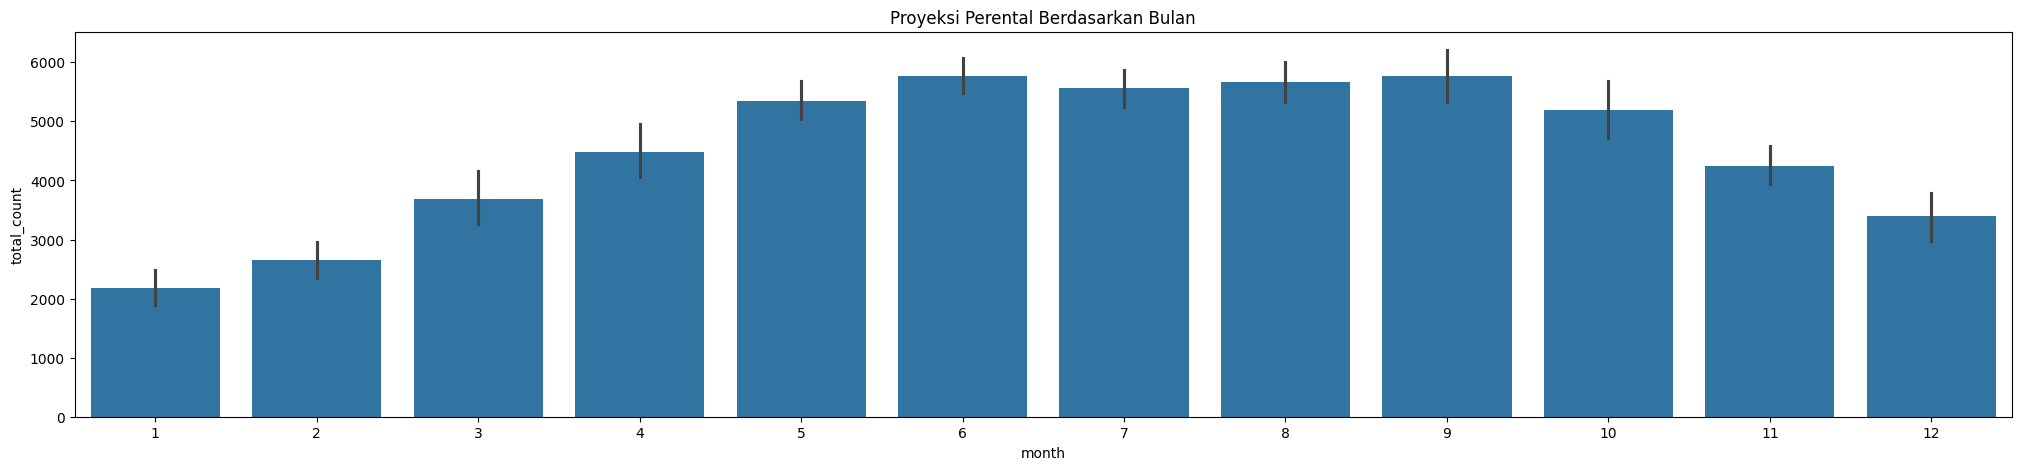

In [375]:
fig, ax = plt.subplots(figsize=(25,5))  # Membuat figur dan axis dengan ukuran tertentu
sns.barplot(data=df_day[['month', 'total_count']], x='month', y='total_count', ax=ax)  # Membuat barplot

ax.set(title='Proyeksi Perental Berdasarkan Bulan')

Bersarkan grafik histogram di atas, dapat dilihat bahwa terjadi kenaikan jumlah rental dalam rentang bulan mei sampai oktober yang mengalami peak/puncak dalam bulan 9

Distribusi perental per bulan berdasarkan musim

[Text(0.5, 1.0, 'Proyeksi Perental Berdasarkan Musim')]

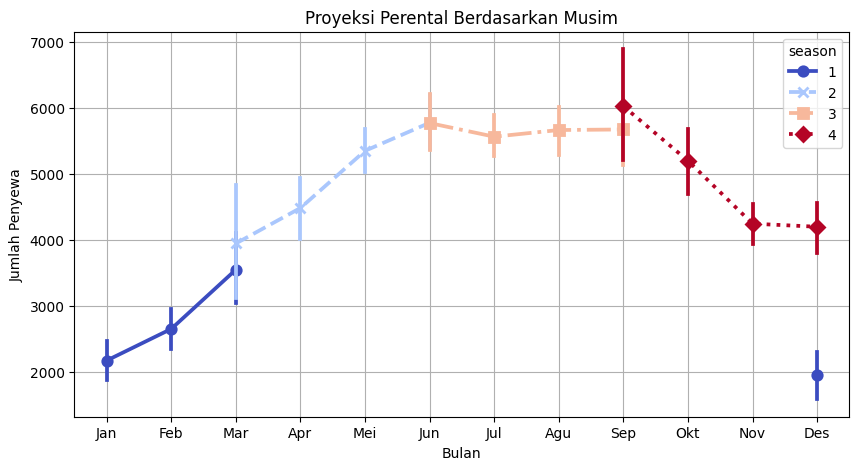

In [376]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df_day, x='month', y='total_count', hue='season', palette='coolwarm', markers=["o", "x", "s", "D"], linestyles=["-", "--", "-.", ":"])


plt.title('Proyeksi Perental Berdasarkan Musim')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

plt.grid(True)
ax.set(title='Proyeksi Perental Berdasarkan Musim')


Dekripsi:
Dari proyeksi perental berdasarkan musim, kita bisa melihat adanya kenaikan dalam musim semi yang dimulai dari bulan maret, dan penurunan ketika memasuki musim dingin dimulai dari bulan oktober

Kelembapan/Humidity dan hubungannya dengan jumlah perental

[Text(0.5, 1.0, 'Proyeksi Hubungan Kelembapan/Humidity dengan Jumlah Perental')]

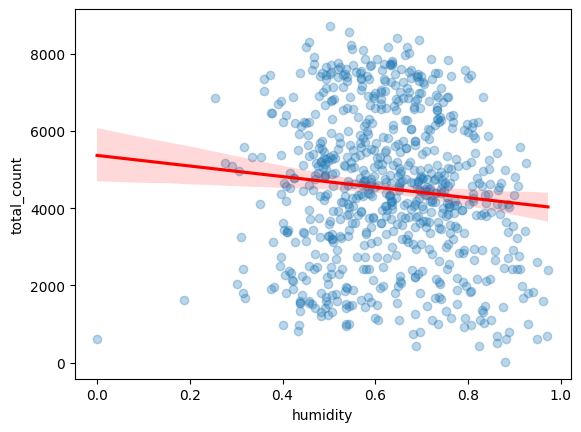

In [377]:
sns.regplot(x='humidity', y='total_count', data=df_day, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

ax.set(title='Proyeksi Hubungan Kelembapan/Humidity dengan Jumlah Perental')

Temprature/Suhu dan hubungannay dengan jumlah perental

[Text(0.5, 1.0, 'Proyeksi Hubungan Suhu/Temprature dengan Jumlah Perental')]

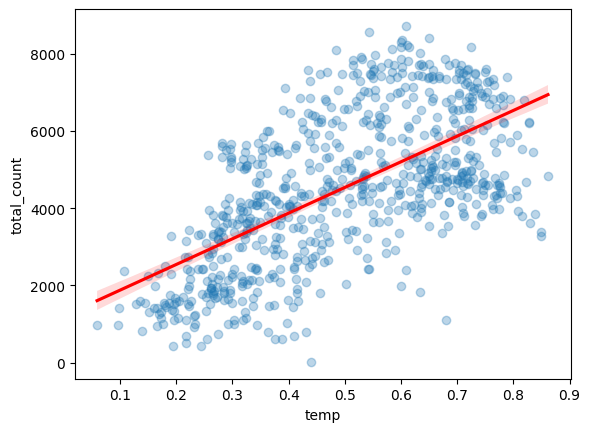

In [378]:
sns.regplot(x='temp', y='total_count', data=df_day, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax.set(title='Proyeksi Hubungan Suhu/Temprature dengan Jumlah Perental')

Cuaca/Weather condi dan hubungannya denga jumlah perental

[Text(0.5, 1.0, 'Proyeksi Hubungan Cuaca/Weather dengan Jumlah Perental')]

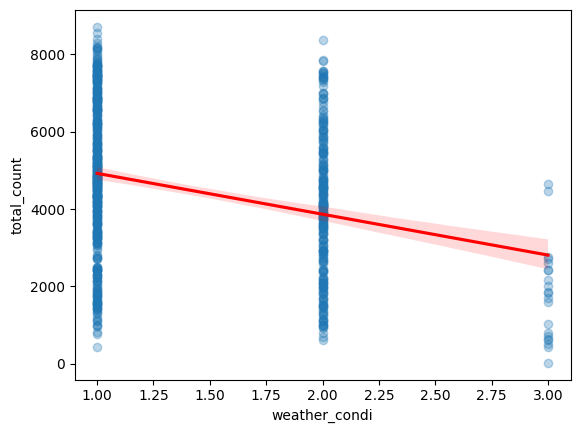

In [379]:
sns.regplot(x='weather_condi', y='total_count', data=df_day, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax.set(title='Proyeksi Hubungan Cuaca/Weather dengan Jumlah Perental')

Kecepatan Angin/Windspeed dan Hubungannya dengan Jumlah Perental

[Text(0.5, 1.0, 'Proyeksi Hubungan Kecepatan Angin/Windspeed dengan Jumlah Perental')]

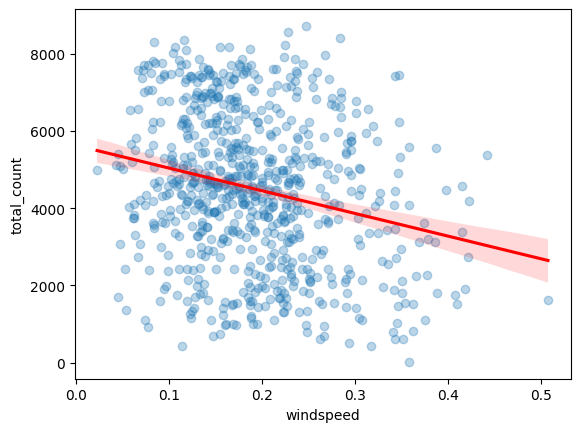

In [380]:
sns.regplot(x='windspeed', y='total_count', data=df_day, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax.set(title='Proyeksi Hubungan Kecepatan Angin/Windspeed dengan Jumlah Perental')

## Visualization & Explanatory Analysis

### 1. Bagaimana perbandingan jumlah total keseluruhan perental sepeda (*total_counts*) untuk masing masing musim panas(*summer*), dan musim dingin(*winter*) pada rentang waktu tahun 2011 dan 2012?

Perbandingan jumlah total keseluruhan perental sepeda pada tiap summer dan winter
summer 2011: 347316
summer 2012: 571273
winter 2011: 326137
winter 2012: 515476
Selisih winter: 189339
Selisih summer: 223957


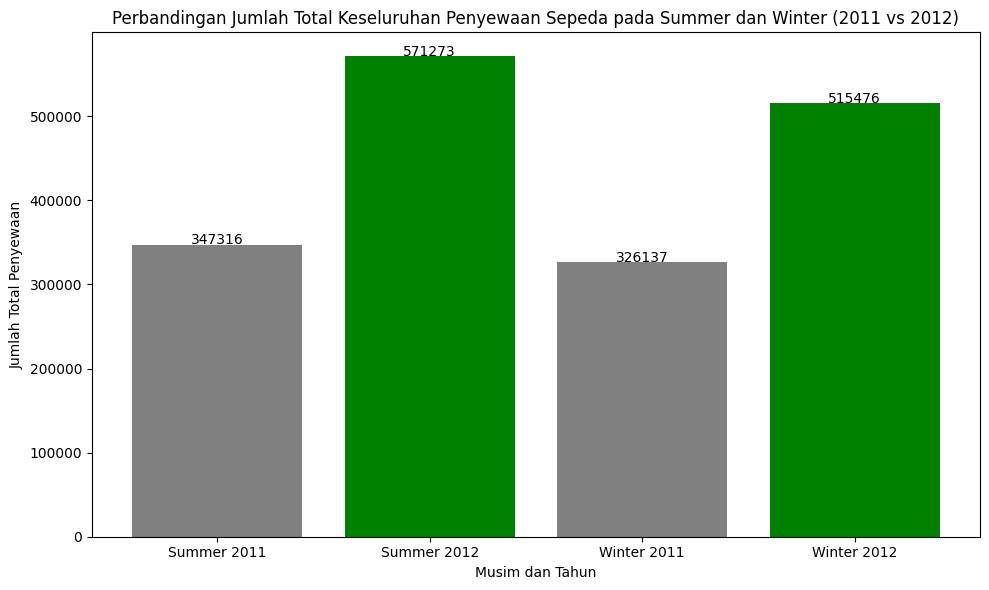

In [381]:
filtered_data1 = df_day[(df_day["year"] == 0) & (df_day["season"] == 2)]
filtered_data2 = df_day[(df_day["year"] == 1) & (df_day["season"] == 2)]
filtered_data3 = df_day[(df_day["year"] == 0) & (df_day["season"] == 4)]
filtered_data4 = df_day[(df_day["year"] == 1) & (df_day["season"] == 4)]

summer1 = filtered_data1["total_count"].sum()
summer2 = filtered_data2["total_count"].sum()
winter1 = filtered_data3["total_count"].sum()
winter2 = filtered_data4["total_count"].sum()
print("Perbandingan jumlah total keseluruhan perental sepeda pada tiap summer dan winter")
print(f"summer 2011: {summer1}")
print(f"summer 2012: {summer2}")
print(f"winter 2011: {winter1}")
print(f"winter 2012: {winter2}")
print(f"Selisih winter: {winter2-winter1}")
print(f"Selisih summer: {summer2-summer1}")
years = ['Summer 2011', 'Summer 2012', 'Winter 2011', 'Winter 2012']
totals = [summer1, summer2, winter1, winter2]

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, totals, color=['grey', 'green', 'grey', 'green'])

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Total Keseluruhan Penyewaan Sepeda pada Summer dan Winter (2011 vs 2012)')
plt.xlabel('Musim dan Tahun')
plt.ylabel('Jumlah Total Penyewaan')

# Menampilkan nilai di atas tiap bar
for i, total in enumerate(totals):
    plt.text(i, total + 500, str(total), ha = 'center')

# Menampilkan plot
plt.tight_layout()
plt.show()

### 2. Bagaimana perbandingan perental yang terdaftar(*registered users*) pada hari kerja(*workingday*) di setiap musim dingin(*winter*), dan musim panas(*summer*) pada tahun 2012

Perbandingan jumlah perental sepeda yang terdaftar pada tiap summer dan winter di tahun 2012
Summer 2012: 333185
Winter 2012: 323556
Selisih    : 9629


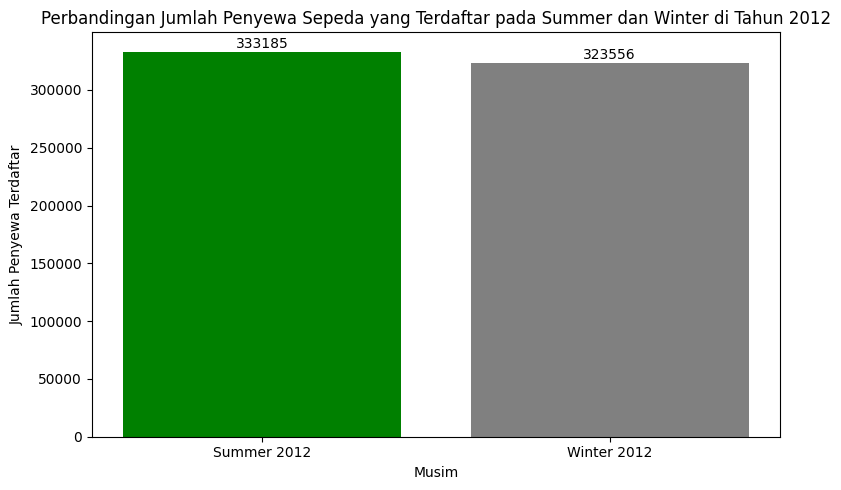

In [382]:
filtered_data1= df_day[(df_day["year"] == 1) & (df_day["season"] == 2) & (df_day["is_workingday"] == 1)]
filtered_data2= df_day[(df_day["year"] == 1) & (df_day["season"] == 4) & (df_day["is_workingday"] == 1)]
summer = filtered_data1["registered"].sum()
winter = filtered_data2["registered"].sum()
print("Perbandingan jumlah perental sepeda yang terdaftar pada tiap summer dan winter di tahun 2012")
print(f"Summer 2012: {summer}")
print(f"Winter 2012: {winter}")
print(f"Selisih    : {summer - winter}")

# Data
categories = ['Summer 2012', 'Winter 2012']
values = [summer, winter]

# Membuat bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['green', 'grey'])

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Penyewa Sepeda yang Terdaftar pada Summer dan Winter di Tahun 2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Terdaftar')

# Menambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, yval, ha='center', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Conclusion

- Dari pertanyaan 1, dapat disimpulkan bahwa terjadi kenaikan perental sepeda baik di masing masing musim summer dan winter. Kenaikan tersebut mencapai 189339 untuk musim winter 2011-2012, dan mencapai 223957 untuk musim summer 2011-2012
- Dari pertanyaan 2, dapat disimpulkan bahwa perental yang sudah terdaftar yang merental pada hari kerja tidak terlalu terjadi perubahan yang signifikan baik dalam musim panas/summer maupun musim dingin/winter di tahun 2012, hal ini dibuktikan dengan selisih perbedaan jumlah perental terdaftar dari di summer dan winter apda thaun 2012 sebesar: 9629 perental.

In [383]:
df_day.to_csv("all_data.csv", index=False)